In [120]:
import os

print(os.getcwd())

e:\Thesis\HybridSpeller\simple_ssvep


In [121]:
import sys
import pandas as pd
import numpy as np

import mne

# visualization stuff
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

# 1. Import Data

Opening raw data file E:\Thesis\HybridSpeller\simple_ssvep\record\sunsun\sunsun4.fif...
    Range : 0 ... 31580 =      0.000 ...   126.320 secs
Ready.
Reading 0 ... 31580  =      0.000 ...   126.320 secs...
Effective window size : 1.024 (s)


C:\Users\Sunsun\AppData\Local\Temp\ipykernel_21456\2000265073.py:1: RuntimeWarning: This filename (E:\Thesis\HybridSpeller\simple_ssvep\record\sunsun\sunsun4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(r'E:\Thesis\HybridSpeller\simple_ssvep\record\sunsun\sunsun4.fif', preload = True)
c:\Users\Sunsun\AppData\Local\Programs\Python\Python38\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


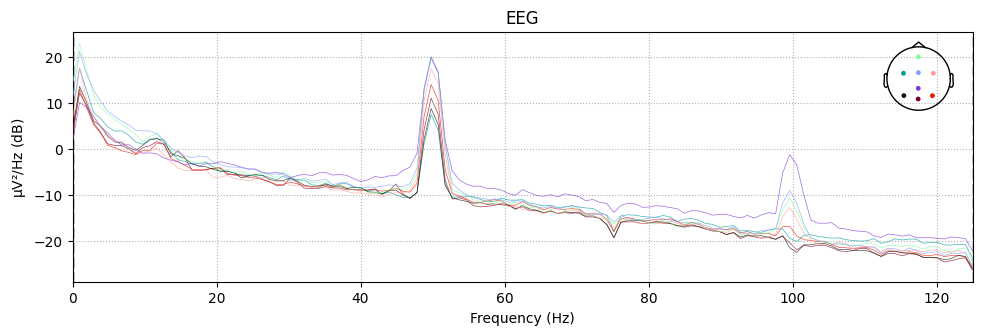

In [122]:
raw = mne.io.read_raw_fif(r'E:\Thesis\HybridSpeller\simple_ssvep\record\sunsun\sunsun4.fif', preload = True)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
raw.compute_psd().plot()
plt.show()

In [123]:
df = raw.to_data_frame()

In [124]:
df.shape #check the size of 0

(31581, 10)

In [125]:
df.head()

,time,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,STIM MARKERS
0,0.000,179854.124784,126448.556781,179600.834846,183644.890785,689813.673496,117784.574628,104736.343026,109074.637294,0.0
1,0.004,180223.464966,126540.124416,179937.258363,183912.023902,690091.073513,117888.778448,104867.666960,109258.718789,0.0
2,0.008,180817.931890,126684.561372,180518.269539,184357.494116,690739.035606,118055.544794,105081.208050,109562.695026,0.0
3,0.012,180796.682835,126681.715250,180493.101478,184339.821339,690707.266331,118049.107492,105071.678758,109551.072121,0.0
4,0.016,180200.994015,126543.000340,179908.245802,183894.425631,690066.099167,117889.851332,104862.116277,109250.508249,0.0


In [126]:
df[df['STIM MARKERS']==2]

,time,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,STIM MARKERS
3056,12.224,180245.831609,126528.993249,179585.188627,183603.197336,690316.677094,117889.747024,104906.879365,109337.247908,2.0
9169,36.676,180185.571313,126548.275352,178999.647498,182881.861925,690289.497375,117855.541408,104870.773852,109280.541539,2.0
15281,61.124,180177.852511,126587.808132,178448.051214,182201.087475,690320.014954,117838.077247,104851.655662,109213.724732,2.0
21391,85.564,180154.889822,126619.279385,177805.364132,181499.332190,690362.036228,117793.753743,104806.900024,109068.118036,2.0
27505,110.020,180116.295815,126618.802547,177097.052336,180857.062340,690400.719643,117774.881423,104783.788323,109022.855759,2.0


In [127]:
print(df[df['STIM MARKERS']==2].shape) #10hz
print(df[df['STIM MARKERS']==1].shape) #6hz
#df.loc[df.Marker==3].index
#df = df.drop(df.loc[df.Marker == 3].index)
print(df[df['STIM MARKERS']==3].shape) #15hz

(5, 10)
(5, 10)
(5, 10)


In [128]:
df = df.drop(["time", "Fz","C3","Cz","C4", "Pz", "PO8", "PO7"], axis=1)

In [129]:
df.head()

,Oz,STIM MARKERS
0,104736.343026,0.0
1,104867.666960,0.0
2,105081.208050,0.0
3,105071.678758,0.0
4,104862.116277,0.0


In [130]:
df

,Oz,STIM MARKERS
0,104736.343026,0.0
1,104867.666960,0.0
2,105081.208050,0.0
3,105071.678758,0.0
4,104862.116277,0.0
...,...,...
31576,104796.476662,0.0
31577,104866.601527,0.0
31578,104868.084192,0.0
31579,104796.171188,0.0


In [131]:
df

,Oz,STIM MARKERS
0,104736.343026,0.0
1,104867.666960,0.0
2,105081.208050,0.0
3,105071.678758,0.0
4,104862.116277,0.0
...,...,...
31576,104796.476662,0.0
31577,104866.601527,0.0
31578,104868.084192,0.0
31579,104796.171188,0.0


# 2. Transform Data into Raw MNE object

# 3. Preprocessing

## Notch Filter

Some artifacts are restricted to certain frequencies and can therefore be fixed by filtering. An artifact that typically affects only some frequencies is due to the power line.

Power-line noise is a noise created by the electrical network. It is composed of sharp peaks at 50Hz (or 60Hz depending on your geographical location). Some peaks may also be present at the harmonic frequencies, i.e. the integer multiples of the power-line frequency, e.g. 100Hz, 150Hz, … (or 120Hz, 180Hz, …).

Remove the 50Hz power line noise in Thailand.  We will also be remove its harmonics, i.e., 100Hz, 150Hz, etc.  Since our signal is 125Hz (250Hz / 2 according to Nyquist Theorem), we shall run the harmonics until 125 Hz.

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
c:\Users\Sunsun\AppData\Local\Programs\Python\Python38\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


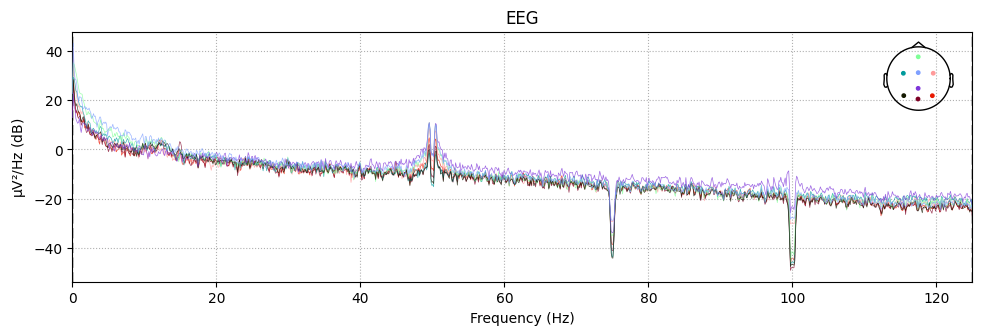

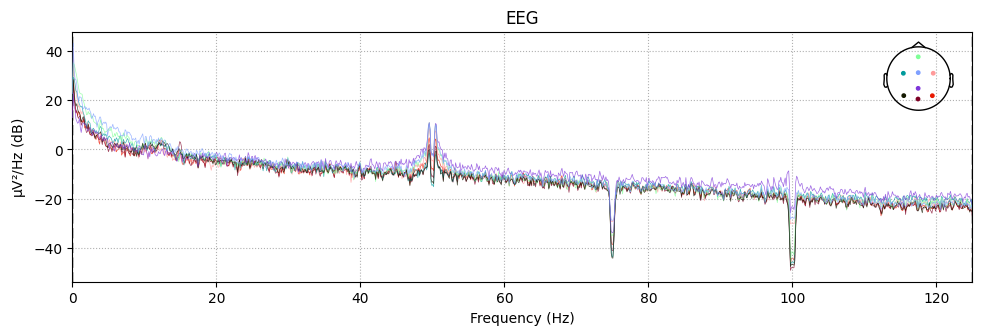

In [132]:
raw.notch_filter(np.arange(50, 125, 50), filter_length='auto', phase='zero') #250/2 based on Nyquist Theorem
#observe that the 50Hz noise is now gone, yay!
raw.plot_psd()

## Band pass filter

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 77 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 77.00 Hz: -6.02, -6.02 dB

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


c:\Users\Sunsun\AppData\Local\Programs\Python\Python38\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


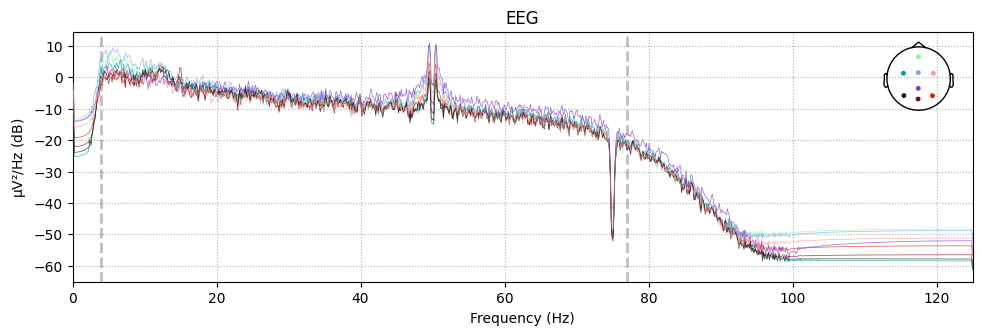

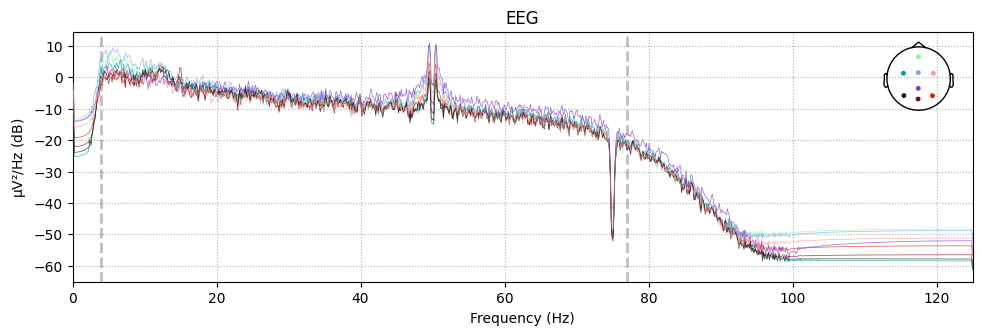

In [133]:
#according to https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0077536,
#the optimal range is 12-18hz

#since we use 6hz, 10hz, and 15hz, 
#we will take five harmonics, which maximum freq is 15 x 5 = 75
#we will take +- 2 at each end, thus 6-2 = 4, and 75+2 = 77

raw.filter(4, 77, method='iir')

raw.plot_psd()

## Independent component analysis

SSVEP is not sensitive against eye artifacts

# 3. Epoching

In [134]:
from mne import Epochs, find_events

def getEpochs(raw, event_id, tmin, tmax):

    #epoching
    events = find_events(raw)
    print("here")
    print(events)
    
    #reject_criteria = dict(mag=4000e-15,     # 4000 fT
    #                       grad=4000e-13,    # 4000 fT/cm
    #                       eeg=100e-6,       # 150 μV
    #                       eog=250e-6)       # 250 μV

    reject_criteria = dict(eeg=100e-6)  #most frequency in this range is not brain components

    epochs = Epochs(raw, events=events, event_id=event_id, 
                    tmin=tmin, tmax=tmax, baseline=None, preload=True,verbose=False)  #8 channels
    print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

    return epochs

In [135]:
#this one requires expertise to specify the right tmin, tmax
event_id = {'6Hz': 1, '10Hz' : 2, '15Hz' : 3}
tmin=0
tmax=6
epochs = getEpochs(raw, event_id, tmin, tmax)
#print(epochs.get_data())

15 events found
Event IDs: [1 2 3]
here
[[ 1018     0     1]
 [ 3056     0     2]
 [ 5094     0     3]
 [ 7131     0     1]
 [ 9169     0     2]
 [11204     0     3]
 [13244     0     1]
 [15281     0     2]
 [17318     0     3]
 [19355     0     1]
 [21391     0     2]
 [23429     0     3]
 [25469     0     1]
 [27505     0     2]
 [29539     0     3]]
sample drop %:  0.0


## Stimuli-Specific PSD

Effective window size : 4.112 (s)
Effective window size : 4.112 (s)
Effective window size : 4.112 (s)


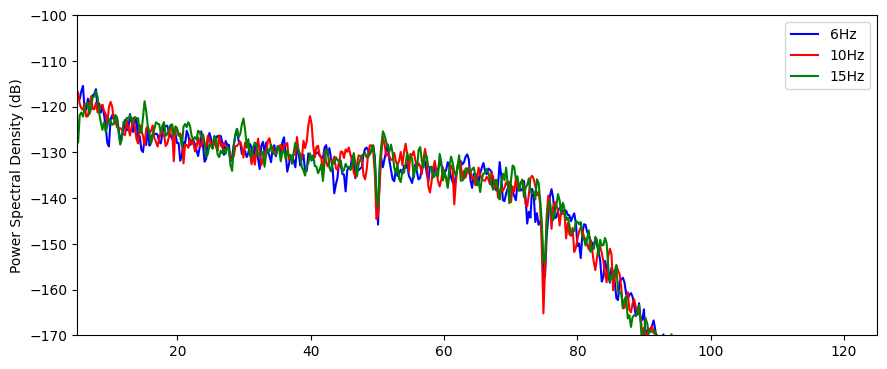

In [136]:
fig = plt.figure(figsize=(10, 4))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

spectrum1 = epochs['6Hz'].compute_psd(method="welch",n_fft=1028, n_per_seg=256 * 3)
psd1, freq1 = spectrum1.get_data(return_freqs=True)

spectrum2 = epochs['10Hz'].compute_psd(method="welch", n_fft=1028, n_per_seg=256 * 3)
psd2, freq2 = spectrum2.get_data(return_freqs=True)

spectrum3 = epochs['15Hz'].compute_psd(method="welch", n_fft=1028, n_per_seg=256 * 3)
psd3, freq3 = spectrum3.get_data(return_freqs=True)

# psd1, freq1 = psd_welch(epochs['6Hz'], n_fft=1028, n_per_seg=256 * 3)
# psd2, freq2 = psd_welch(epochs['10Hz'], n_fft=1028, n_per_seg=256 * 3)
# psd3, freq3 = psd_welch(epochs['15Hz'], n_fft=1028, n_per_seg=256 * 3)

logpsd1 = 10 * np.log10(psd1)
logpsd2 = 10 * np.log10(psd2)
logpsd3 = 10 * np.log10(psd3)

log_psd1_mean = logpsd1.mean(0)
log_psd1_std = logpsd1.mean(0)

log_psd2_mean = logpsd2.mean(0)
log_psd2_std = logpsd2.mean(0)

log_psd3_mean = logpsd3.mean(0)
log_psd3_std = logpsd3.mean(0)

axes.plot(freq1, log_psd1_mean[[0,1], :].mean(0), color='b', label='6Hz')
axes.plot(freq2, log_psd2_mean[[0,1], :].mean(0), color='r', label='10Hz')
axes.plot(freq2, log_psd3_mean[[0,1], :].mean(0), color='g', label='15Hz')

axes.set_title('')
axes.set_ylabel('Power Spectral Density (dB)')
axes.set_xlim(5, 125)
axes.set_ylim(-170, -100)
axes.legend()
plt.show()

# Filterbank CCA

Typical decoding technique for SSVEP is Canonical Correlation Analysis.

In [140]:
from fbcca import fbcca

epochs.pick_types(eeg=True)
X1 = epochs['6Hz'].get_data()
X2 = epochs['10Hz'].get_data()
X3 = epochs['15Hz'].get_data()
list_freqs = [6, 10, 15]
fs = 250
num_harms = 5
num_fbs = 5

print("6hz: =============================================")
print("==================================================")
fbcca(X1, list_freqs, fs, num_harms, num_fbs)
print("10hz: ============================================")
print("==================================================")
fbcca(X2, list_freqs, fs, num_harms, num_fbs)
print("15hz: ============================================")
print("==================================================")
fbcca(X3, list_freqs, fs, num_harms, num_fbs)



6hz: =============================================
rho:  [1.14809657 0.82852839 0.65604588]
result:  0
correlation:  1.1480965707407627
rho:  [1.18860592 0.71270247 0.78472968]
result:  0
correlation:  1.188605920905071
rho:  [1.4384416  1.00597815 0.99492309]
result:  0
correlation:  1.4384415995178461
rho:  [1.32932214 0.75154472 0.8720982 ]
result:  0
correlation:  1.3293221400570099
rho:  [1.15247021 0.9837069  0.8372093 ]
result:  0
correlation:  1.1524702073498632
====Most recurrent class: ==== 0
====Average correlation: ===== 1.2513872877141103
10hz: ============================================


e:\Thesis\HybridSpeller\simple_ssvep\fbcca.py:74: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("====Most recurrent class: ====", mode(r_mode)[0][0])


rho:  [0.79981762 1.82800028 0.79534505]
result:  1
correlation:  1.8280002827061654
rho:  [0.81074299 1.64300837 0.83449107]
result:  1
correlation:  1.6430083672269264
rho:  [0.82106077 1.70540397 0.89816949]
result:  1
correlation:  1.7054039733858037
rho:  [1.02614624 1.80144926 0.76752091]
result:  1
correlation:  1.8014492630307064
rho:  [0.69545079 1.38289304 0.64161348]
result:  1
correlation:  1.3828930441688603
====Most recurrent class: ==== 1
====Average correlation: ===== 1.6721509861036925
15hz: ============================================
rho:  [0.86558983 0.88541017 1.87649563]
result:  2
correlation:  1.8764956338564416


e:\Thesis\HybridSpeller\simple_ssvep\fbcca.py:74: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("====Most recurrent class: ====", mode(r_mode)[0][0])


rho:  [1.07842618 1.03513249 2.07985624]
result:  2
correlation:  2.079856235505047
rho:  [1.32664168 1.24265219 2.15715937]
result:  2
correlation:  2.1571593703876895
rho:  [1.11381011 1.0715916  1.88682812]
result:  2
correlation:  1.8868281200977362
rho:  [1.00873692 1.01993348 1.56031227]
result:  2
correlation:  1.5603122664308455
====Most recurrent class: ==== 2
====Average correlation: ===== 1.9121303252555517


e:\Thesis\HybridSpeller\simple_ssvep\fbcca.py:74: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("====Most recurrent class: ====", mode(r_mode)[0][0])
